# Download and plot PermaSense groundsurface temperature data

In [ ]:
require(zoo)
require(xts)
library(ggplot2)

In [10]:
# set miliseconds time resolution
options(digits.secs = 6)

## construct method to concatenate strings with ampersand 
"&" <- function(...) UseMethod("&")
"&.default" <- .Primitive("&")
"&.character" <- function(...) paste(...,sep="")

## DEFINE DIFFERENT VARIABLES (CHANGE TO YOUR NEEDS)
# all input times are UTC!!!
date_beg <- "01/01/2017+23:00:00"
#date_beg <- "17/09/2018+23:00:00"
date_end <- strftime(Sys.time(), format="%d/%m/%Y+%H:%M:%S", tz="UTC")

date_beg_string <- strftime(as.POSIXct(date_beg, origin="1970-01-01", format="%d/%m/%Y+%H:%M:%S", tz="UTC"), format="%d/%m/%Y")
date_end_string <- strftime(as.POSIXct(date_end, origin="1970-01-01", format="%d/%m/%Y+%H:%M:%S", tz="UTC"), format="%d/%m/%Y")

## set server
server <- "http://data.permasense.ch/"
virtual_sensor <- "matterhorn_temperature_rock"
#virtual_sensor <- "matterhorn_temperature_fracture"

#positions 10, 11, 27, 30, 46, 47 (earlier data 12)
position=27

In [ ]:
## CREATING URL FOR GSN-REQUEST
## selection by time intervall, position ordered by generation_time
query<- "vs[1]=" & virtual_sensor & "&time_format=unix&field[1]=All&from=" & date_beg & "&to=" & date_end & 
        "&c_join[1]=and&c_vs[1]=" & virtual_sensor & 
        "&c_field[1]=position&c_min[1]=" & position-1 & "&c_max[1]=" & position & 
#        "&timeline=generation_time&agg_function=avg&agg_unit=300000&agg_period=12"
        "&timeline=generation_time"
# by device_id
#query<- "vs[1]=" & virtual_sensor & "&time_format=unix&field[1]=All&from=" & date_beg & "&to=" & date_end & "&c_join[1]=and&c_vs[1]=" & virtual_sensor & "&c_field[1]=device_id&c_min[1]=" & position-1 & "&c_max[1]=" & position & "&timeline=generation_time"

## construct url:
url<-server & "multidata?" & query 
print("http request is: "&url)

## ACCESS TO GSN DATABASE
## accessing data and making of data frame (from csv export)
## skip header lines (first 2) for import
dat <- data.frame()
dat <- read.csv(url, skip=2, stringsAsFactors=FALSE)
print("Number of lines read: "&length(dat[,1]))

# fix first column naming
names(dat)[1]<-paste("position")

[1] "http request is: http://data.permasense.ch/multidata?vs[1]=matterhorn_temperature_rock&time_format=unix&field[1]=All&from=01/01/2017+23:00:00&to=21/11/2019+09:13:09&c_join[1]=and&c_vs[1]=matterhorn_temperature_rock&c_field[1]=position&c_min[1]=26&c_max[1]=27&timeline=generation_time"


prepare data frame; check gentime spacing

In [ ]:
#dat <- cbind(dat, dat$generation_time)
#names(dat)[21] <- paste("gentime_inc")

#i=length(dat$generation_time)
#dat$gentime_inc[i] = 0
#i = i-1
#while (i > 0){
#  dat$gentime_inc[i] <- (dat$generation_time[i] - dat$generation_time[i+1]) / 1000
#  i = i-1
#}

Now lets build aggregates

In [ ]:
dat$generation_time <- as.POSIXct(dat$generation_time/1000, origin="1970-01-01", format="%Y-%m-%d", tz="CET")

In [ ]:
dat.xts <- xts(dat, order.by=dat$generation_time, na.approx())
dat.xts$gentime_inc <- NULL
dat.xts$generation_time <- NULL
ep<-endpoints(dat.xts, on="hours", k=3)  #on="how your data is spaced",k=how you want to club it
dat.xts.downsampled<-period.apply(dat.xts, FUN=mean, INDEX=ep, na.rm=TRUE)
dat.downsampled <- data.frame()
dat.downsampled <- fortify.zoo(dat.xts.downsampled, names=c("generation_time"))

Now plotting

In [ ]:
xlimstring = c(as.POSIXct(date_beg, origin="1970-01-01", format="%d/%m/%Y+%H:%M:%S", tz="UTC"),
               as.POSIXct(date_end, origin="1970-01-01", format="%d/%m/%Y+%H:%M:%S", tz="UTC"))
ylimstring <- c(-20,20)

plot(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_nearsurface_t1, xlim = xlimstring, type="s", pch=20, ylim = ylimstring,
     main="Temperature - Position "&position&" - "&date_beg_string&" to "&date_end_string, xlab="", ylab="[C]", col= terrain.colors(11)[1])
abline(h=0, lty=3)
lines(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_nearsurface_t2, type="s", pch=20, col = terrain.colors(11)[2])
lines(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_5cm,   type="s", pch=20, col = terrain.colors(11)[3])
lines(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_10cm,  type="s", pch=20, col = terrain.colors(11)[4])
lines(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_20cm,  type="s", pch=20, col = terrain.colors(11)[5])
lines(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_30cm,  type="s", pch=20, col = terrain.colors(11)[6])
lines(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_35cm,  type="s", pch=20, col = terrain.colors(11)[7])
lines(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_50cm,  type="s", pch=20, col = terrain.colors(11)[8])
lines(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_60cm,  type="s", pch=20, col = terrain.colors(11)[9])
lines(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_85cm,  type="s", pch=20, col = terrain.colors(11)[10])
lines(as.POSIXlt(dat.downsampled$generation_time),dat.downsampled$temperature_100cm, type="s", pch=20, col = terrain.colors(11)[11])
legend("top", inset=0.05, cex=1.0, bg="white",
       legend=c("Number of samples: "&length(dat.downsampled$generation_time)
       ))

plot_name <- "temperature_plot_"&position&".pdf"
dev.copy(pdf,plot_name, width=29.7/2.54, height=21/2.54)
dev.off()

Loading required package: viridisLite


[1] "#191970" "#13138E" "#0E0EAC" "#0909CA" "#0303E8" "#0C0DFF" "#3F41FF"
 [8] "#7175FF" "#A4A9FF" "#D6DDFF" "#F1F8E4" "#F4FAAE" "#F7FB78" "#FBFD43"
[15] "#FEFE0D" "#ECD600" "#D4A100" "#BB6B00" "#A33500" "#8B0000"

pdf 
  3

png 
  2

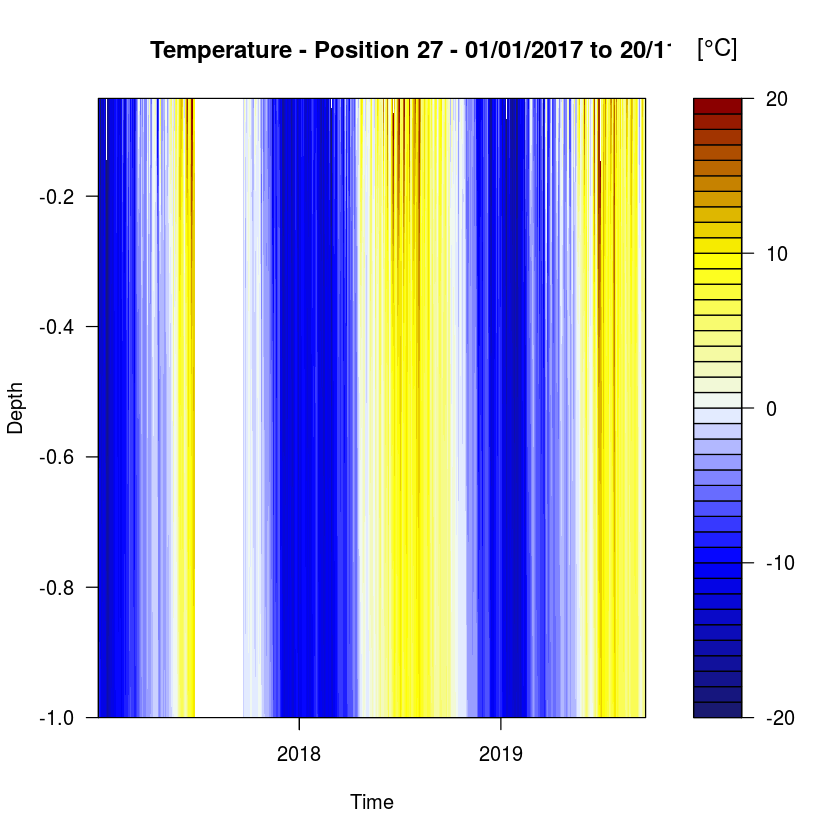

In [8]:
library("viridis")
x<-c(as.POSIXct(dat.downsampled$generation_time, origin="1970-01-01", format="%d/%m/%Y", tz="UTC"))

if (position == 7) {
  depth<-c(-3.0,-2.0,-1.0,-0.1)
  tempdat <- cbind(dat.downsampled$temperature_300cm,
                   dat.downsampled$temperature_200cm,
                   dat.downsampled$temperature_100cm,
                   dat.downsampled$temperature_10cm)
}

if (position == 10) {
  depth<-c(-0.85,-0.6,-0.35,-0.1,-0.02)
  tempdat <- cbind(dat.downsampled$temperature_85cm,
                   dat.downsampled$temperature_60cm,
                   dat.downsampled$temperature_35cm,
                   dat.downsampled$temperature_10cm,
                   dat.downsampled$temperature_nearsurface_t2)
}

if (position > 12) {
  depth<-c(-1,-0.5,-0.3,-0.2,-0.1,-0.05)
  tempdat <- cbind(dat.downsampled$temperature_100cm,
                   dat.downsampled$temperature_50cm,
                   dat.downsampled$temperature_30cm,
                   dat.downsampled$temperature_20cm,
                   dat.downsampled$temperature_10cm,
                   dat.downsampled$temperature_5cm)
}

colfunc <- colorRampPalette(c("midnightblue", "blue", "aliceblue", "yellow", "darkred"))
colfunc(20)
zlim=c(-20,20)
nlevels = 40

filled.contour(x, y=depth, z=tempdat, 
               zlim=zlim,
               levels = pretty(zlim, nlevels), nlevels = nlevels,
               col = colfunc(nlevels),
               ylab="Depth", xlab="Time", xaxs="i",
               key.title=title(expression('['*degree*'C]'))
)
title(main="Temperature - Position "&position&" - "&date_beg_string&" to "&date_end_string)

dev.copy(pdf,"temperature_contours_"&position&".pdf", width=29.7/2.54, height=21/2.54)
dev.off()